In [5]:
import bempp.api
import numpy as np
from scipy.stats import ortho_group
import math
import time
import scipy.linalg 
import scipy.linalg.interpolative as sli
%matplotlib inline
from matplotlib import pyplot as plt

from bempp.api.assembly.blocked_operator import BlockedOperator
from numpy.linalg import slogdet
#bempp.api.enable_console_logging()

In [40]:
n = 1000
x = np.linspace(-1, 1, n)
eps = 0.1

In [41]:
def fun(x, y):
    """Evaluate a kernel function on a tensor grid"""
    xx = x.reshape(n,1)
    yy = y.reshape(1,n)
    return 1./(eps + np.abs(xx-yy))

In [47]:
mat = fun(x, x)

mat = mat[50:100, 100:150]

In [53]:
"""ID"""
def err(mat, k):
    idx1,proj1 = sli.interp_decomp(mat, k, rand = False)
    C = sli.reconstruct_skel_matrix(mat,k,idx1)
    V_conj_trans = sli.reconstruct_interp_matrix(idx1,proj1)
    
    C_conj_trans = C.conj().T
    idx2,proj2 = sli.interp_decomp(C_conj_trans, k, rand = False)
    CC_conj_trans = sli.reconstruct_skel_matrix(C_conj_trans,k,idx2)
    W_conj_trans = sli.reconstruct_interp_matrix(idx2,proj2)
    
    CC = CC_conj_trans.conj().T
    W = W_conj_trans.conj().T
    
    ID_approx = C @ V_conj_trans
    tsID_approx = W@CC@V_conj_trans
    
    error_ID = np.linalg.norm(ID_approx - mat)/np.linalg.norm(mat)
    error_tsID = np.linalg.norm(tsID_approx - mat)/np.linalg.norm(mat)
    
    return error_ID, error_tsID

In [57]:
err1 = []
err2 = []
for i in range(1,50+1):
    err1.append(err(mat,i)[0])
    err2.append(err(mat,i)[1])

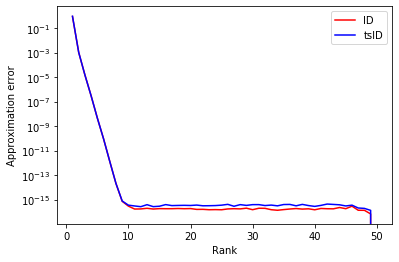

In [62]:
x = range(1,50+1) 
plt.semilogy(x, err1,'r-')
plt.semilogy(x,err2, 'b-')
plt.ylabel('Approximation error')
plt.xlabel('Rank')
plt.legend(['ID', 'tsID'])
plt.savefig('ID and tsID error.pdf')

In [70]:
u,s,vh = np.linalg.svd(mat)

Text(0.5, 0, 'Index of singular value')

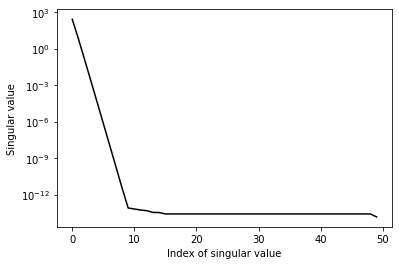

In [73]:
x = range(50) 
plt.semilogy(x, s,'k-')
plt.ylabel('Singular value')
plt.xlabel('Index of singular value')
#plt.savefig('ID and tsID error.pdf')